importing neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

exploring datasets 


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

train.head()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
def check(data):
    check = []
    column=data.columns
    for i in column:
        type_of_data = data[i].dtypes
        unique_vals = data[i].nunique()
        null =data[i].isnull().sum()
        check.append([i, type_of_data, unique_vals, null])
    df_check=pd.DataFrame(check)
    df_check.columns=['column_name', 'type_of_data', 'unique_vals', 'null']
    return df_check

check(train)

,column_name,type_of_data,unique_vals,null
0,id,int64,1117957,0
1,MonsoonIntensity,int64,17,0
2,TopographyDrainage,int64,19,0
3,RiverManagement,int64,17,0
4,Deforestation,int64,18,0
5,Urbanization,int64,18,0
6,ClimateChange,int64,18,0
7,DamsQuality,int64,17,0
8,Siltation,int64,17,0
9,AgriculturalPractices,int64,17,0


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531782,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [7]:
def plot(data, col):
    f,(ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.15, 0.85)}, figsize = (12,6))
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

id


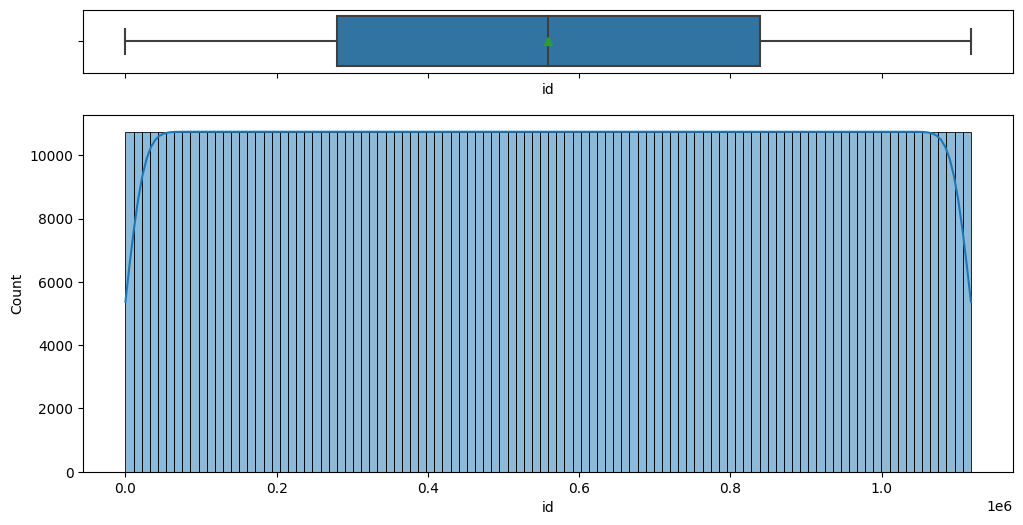

MonsoonIntensity


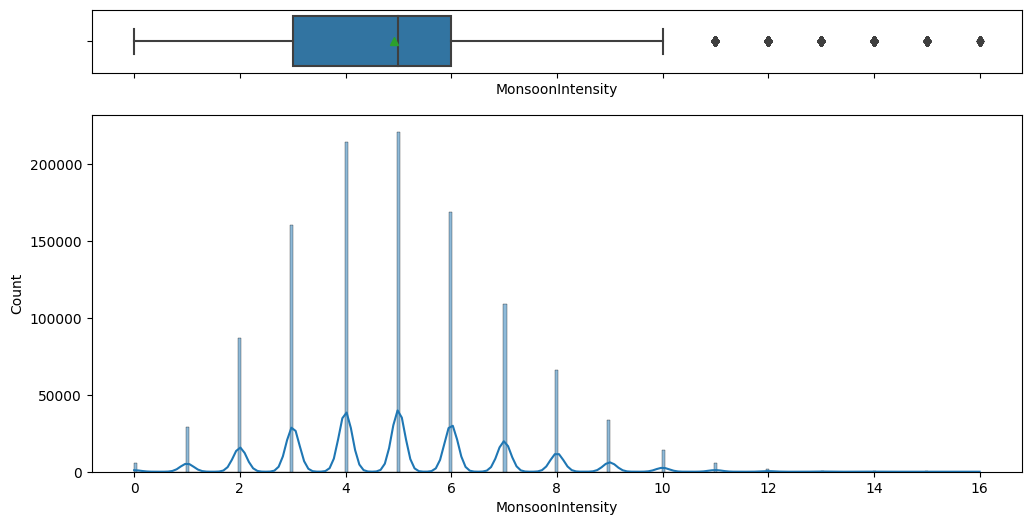

TopographyDrainage


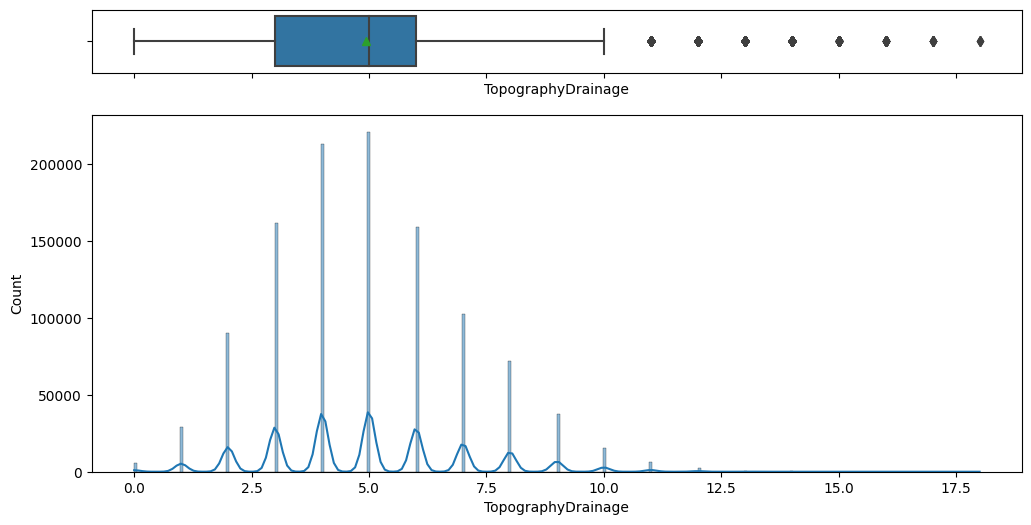

RiverManagement


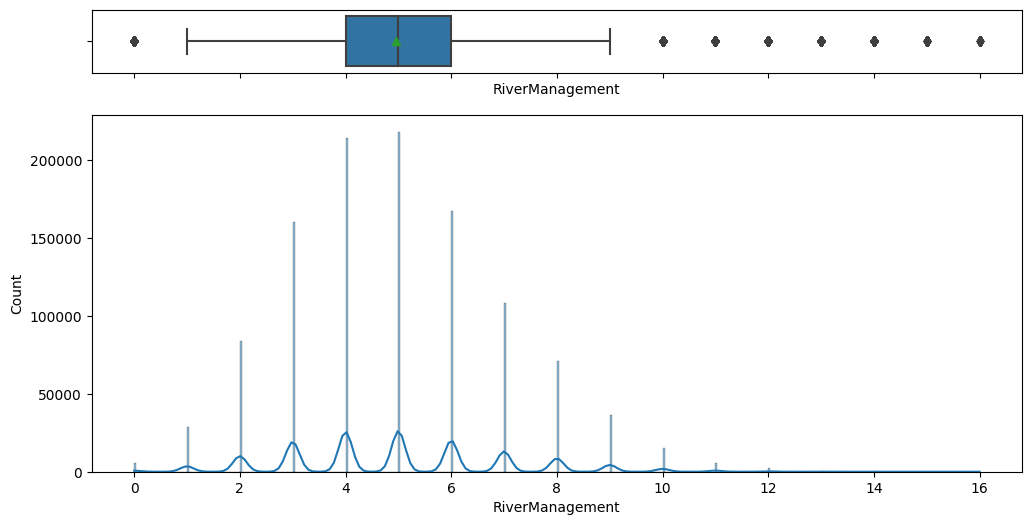

Deforestation


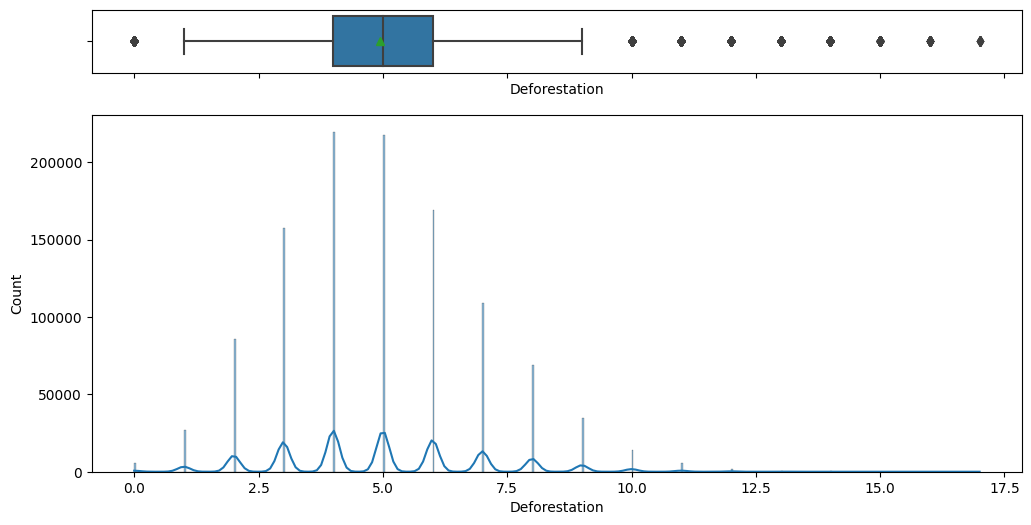

Urbanization


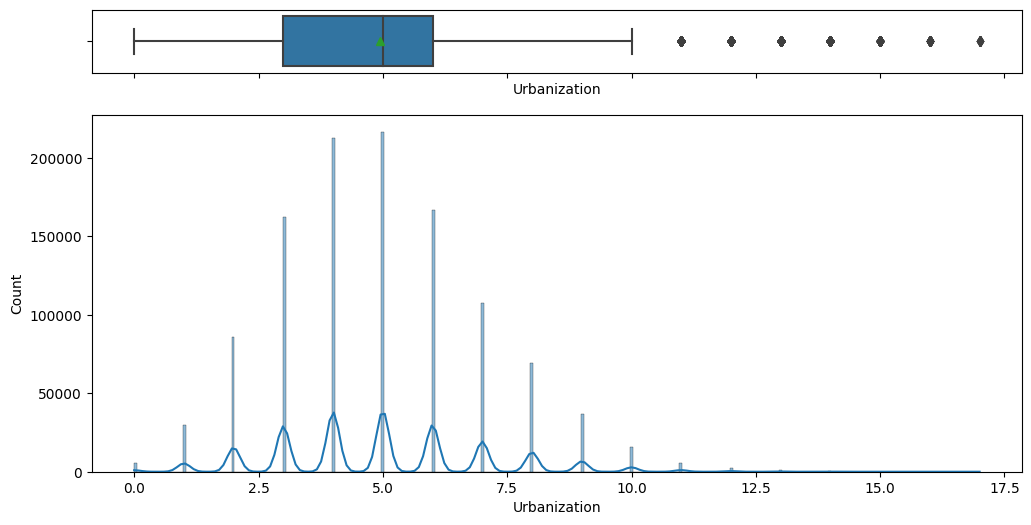

ClimateChange


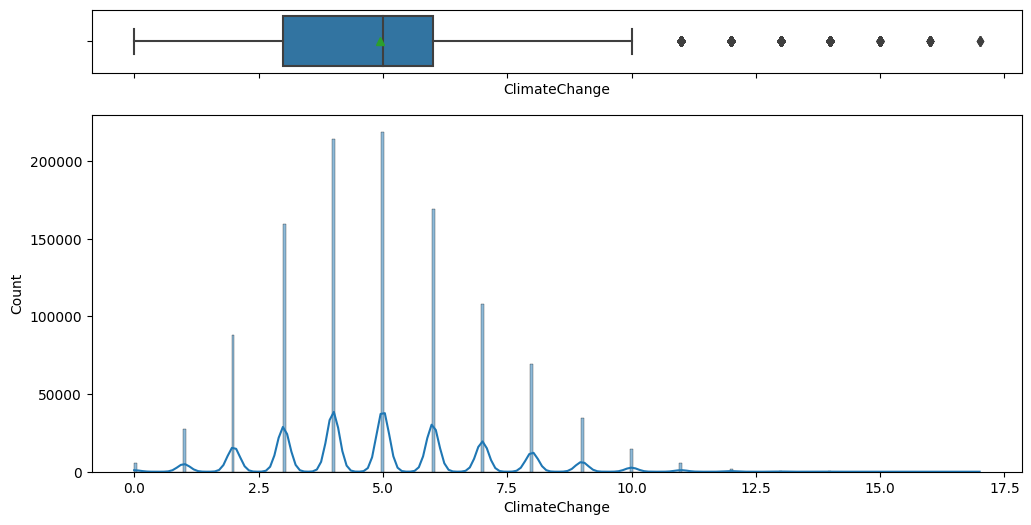

DamsQuality


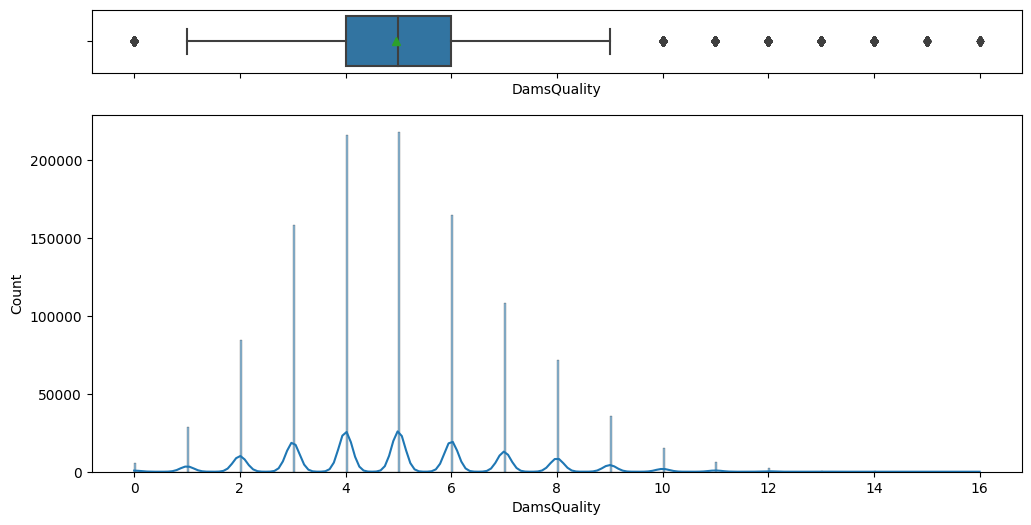

Siltation


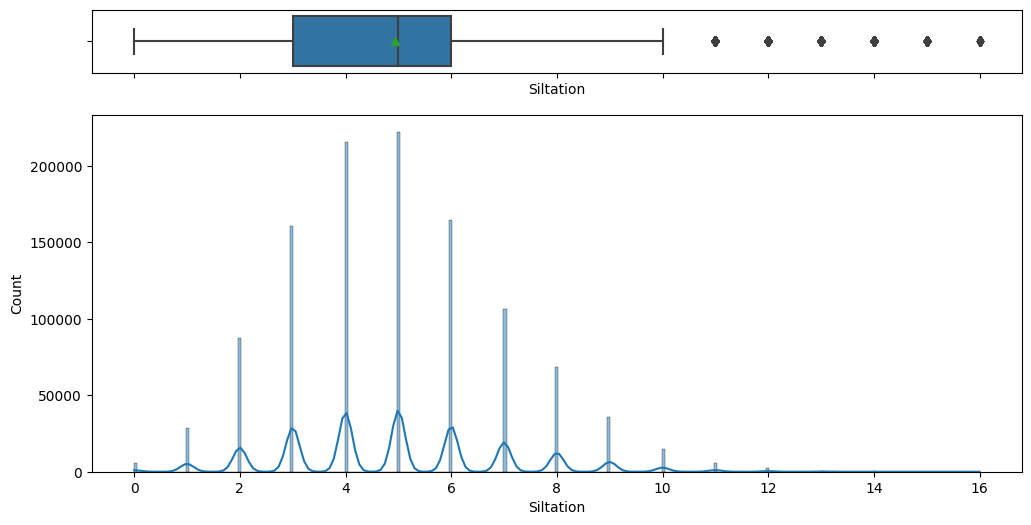

AgriculturalPractices


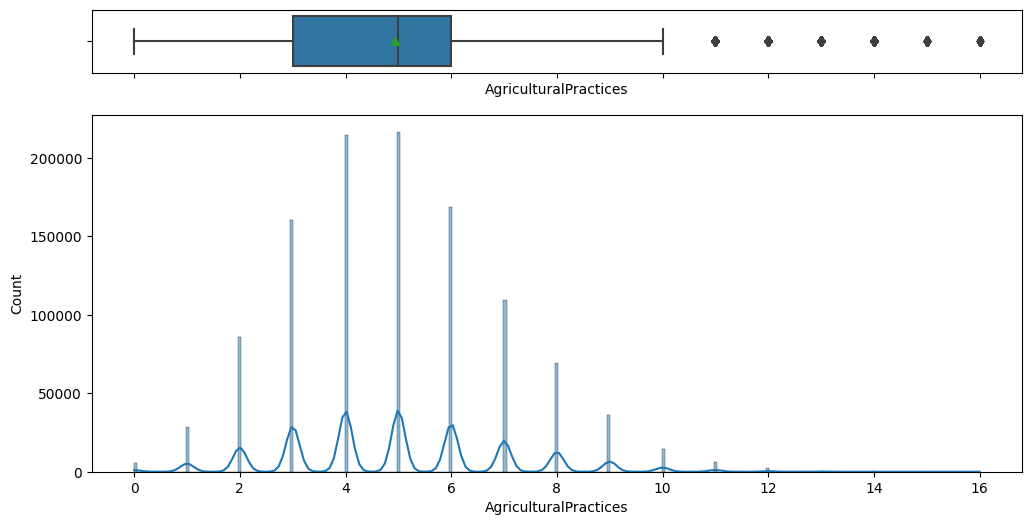

Encroachments


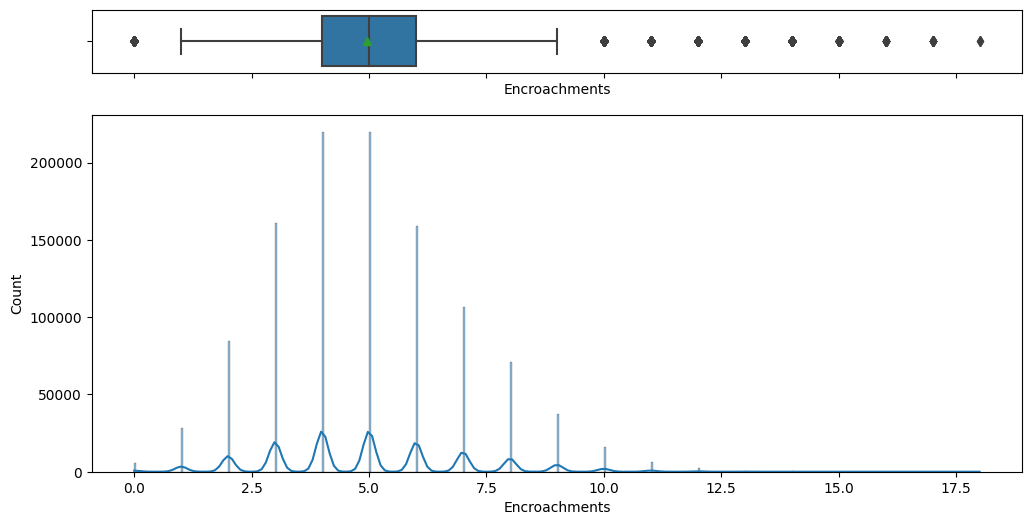

IneffectiveDisasterPreparedness


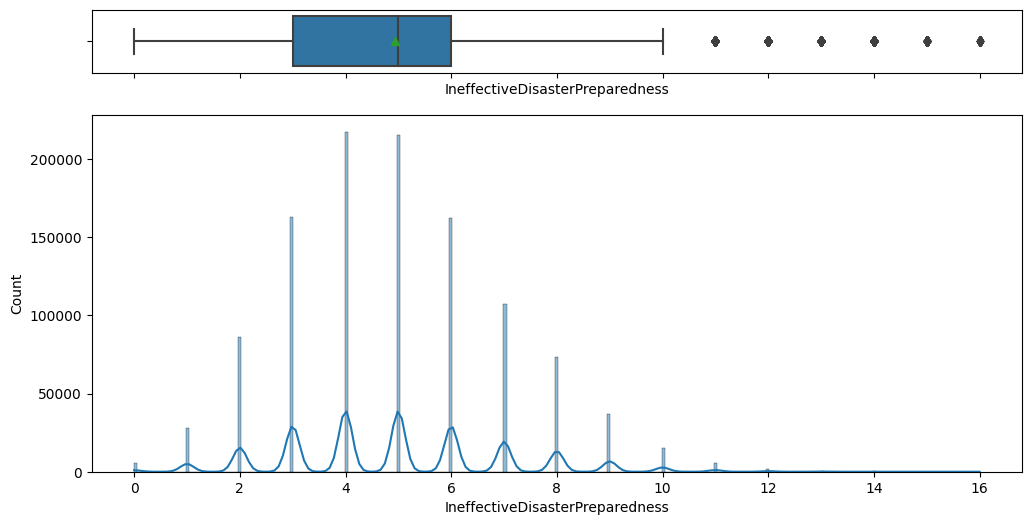

DrainageSystems


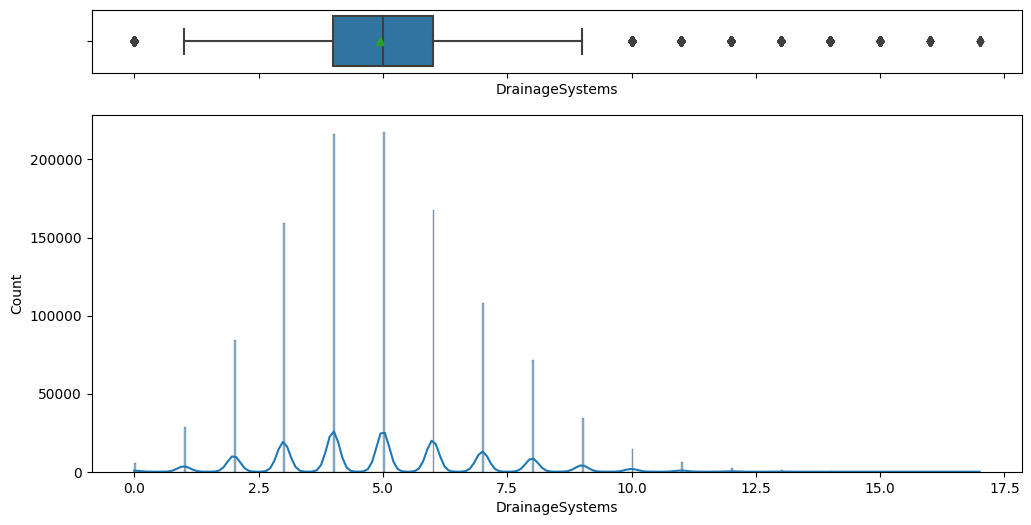

CoastalVulnerability


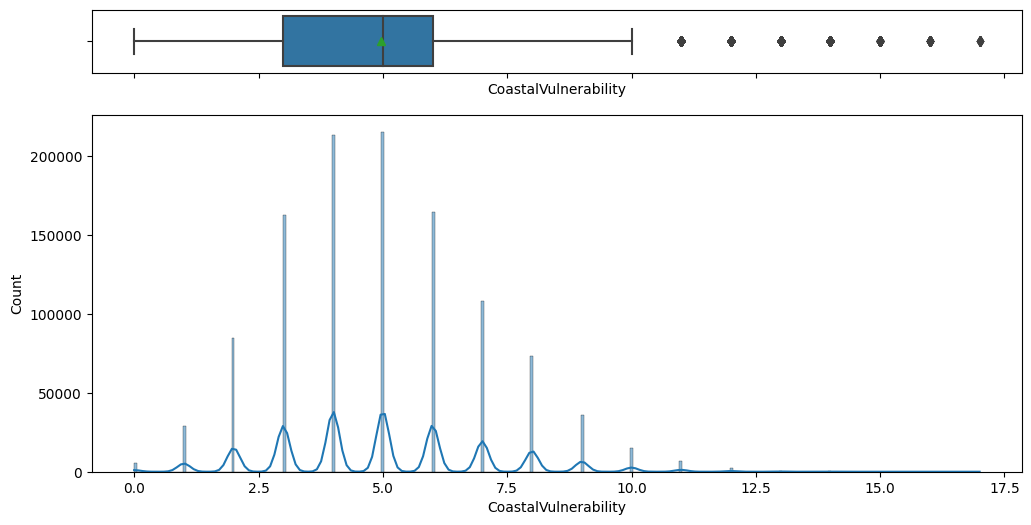

Landslides


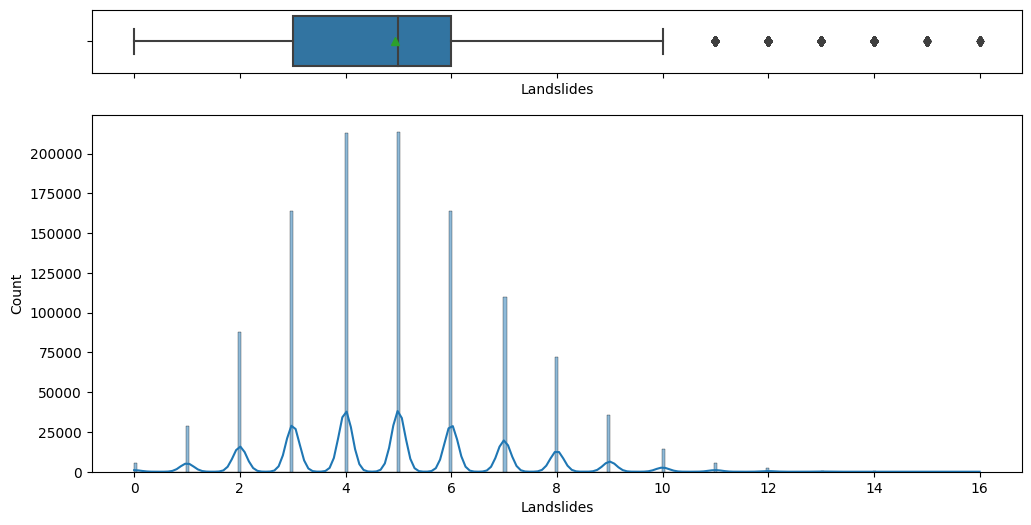

Watersheds


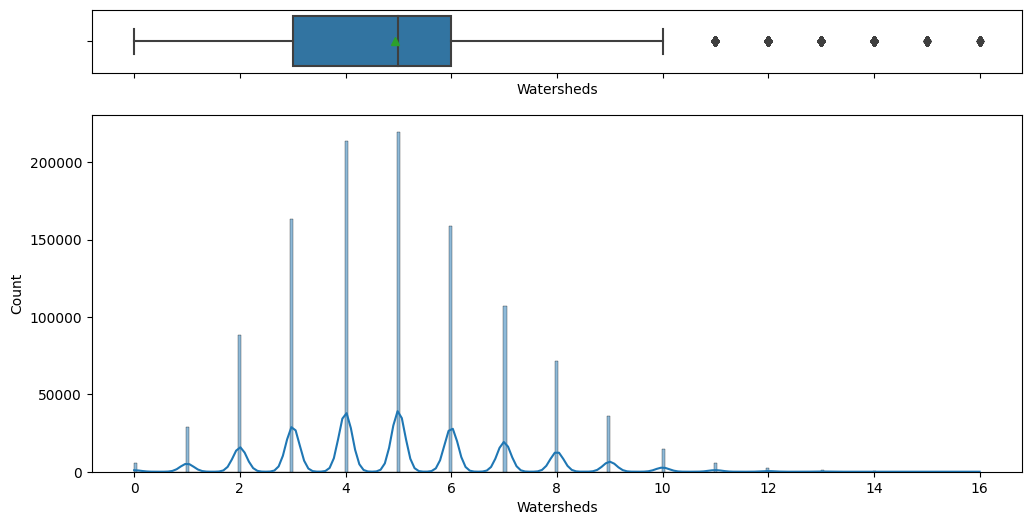

DeterioratingInfrastructure


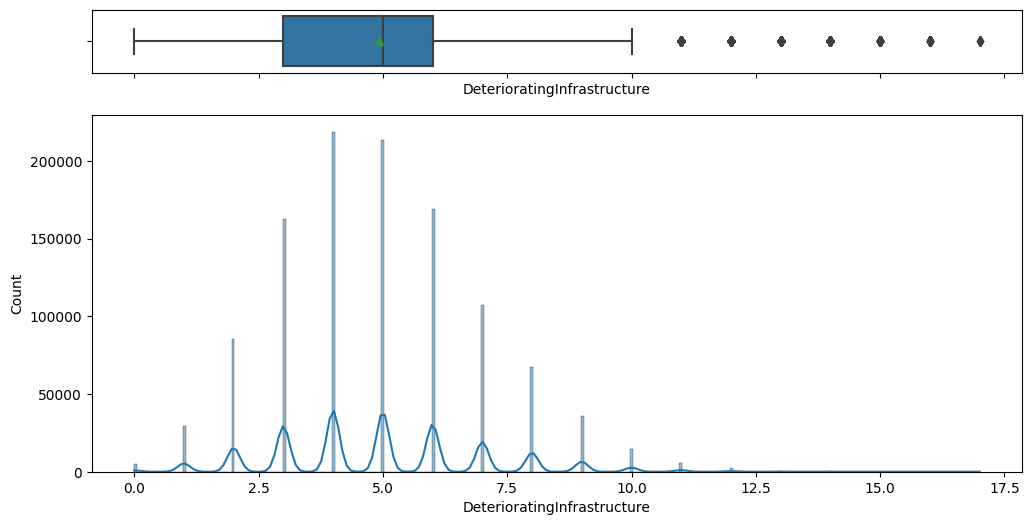

PopulationScore


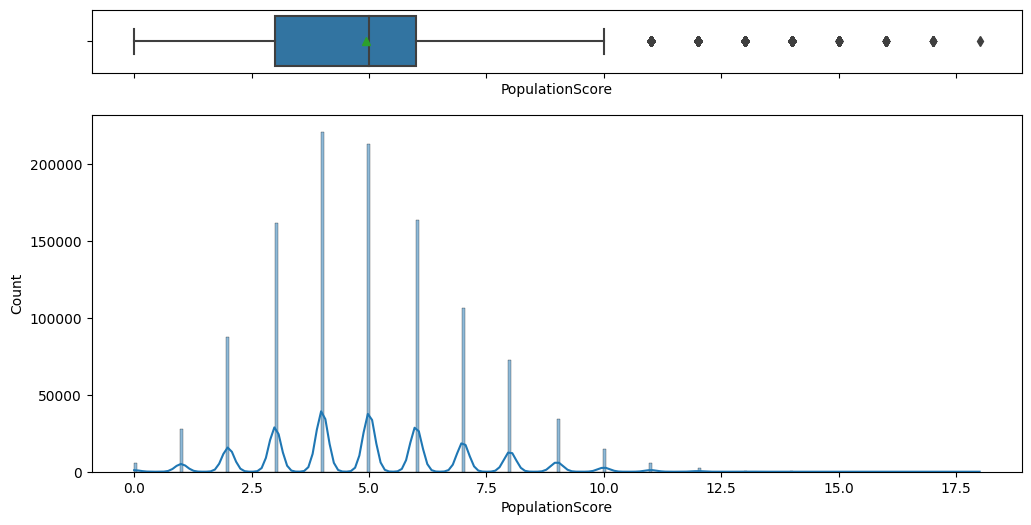

WetlandLoss


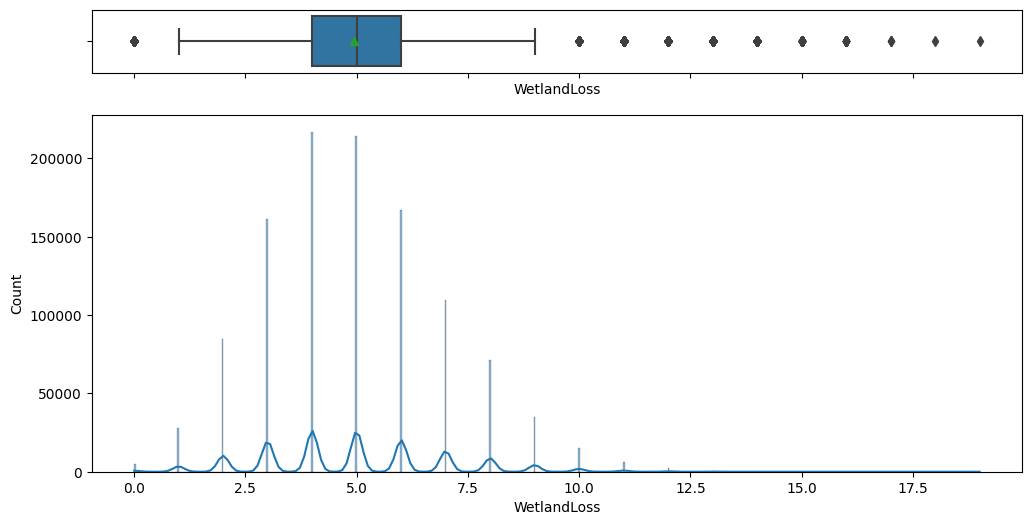

InadequatePlanning


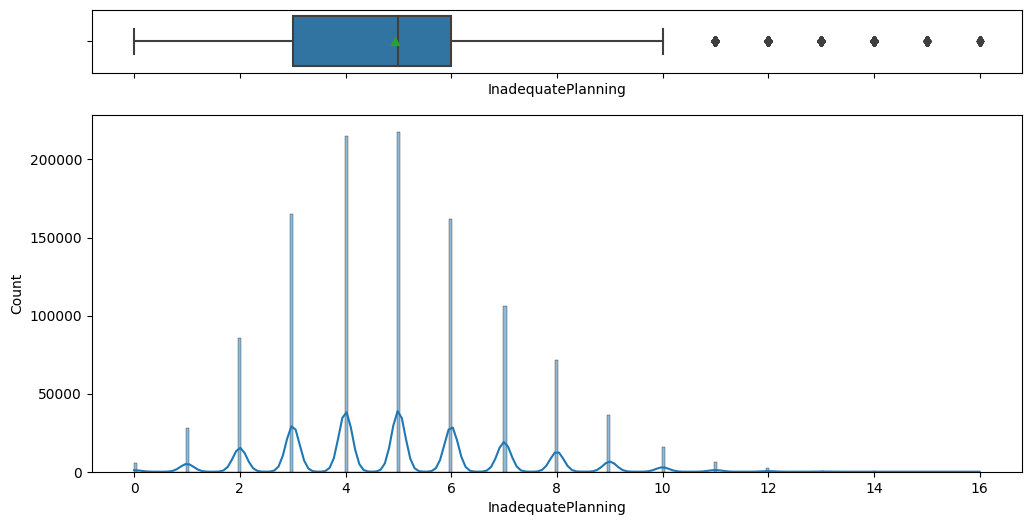

PoliticalFactors


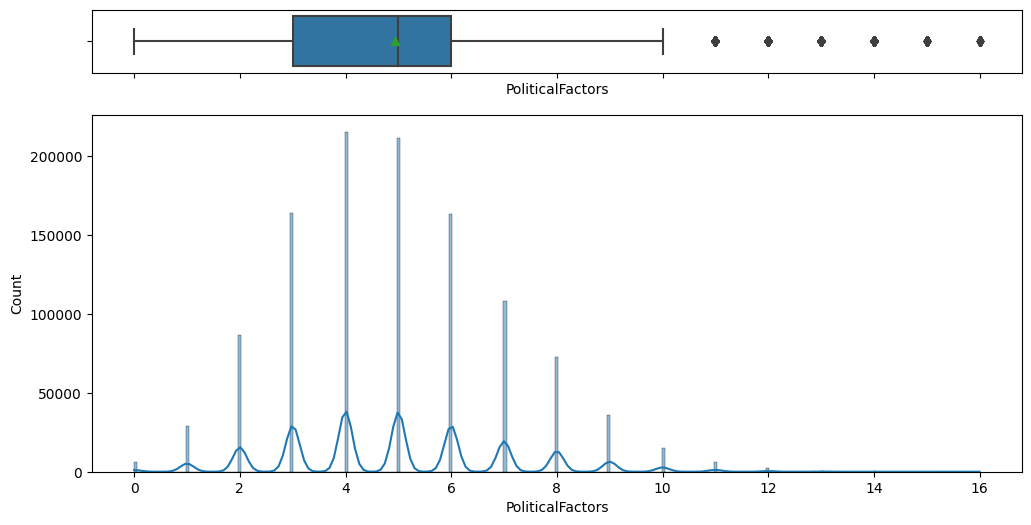

FloodProbability


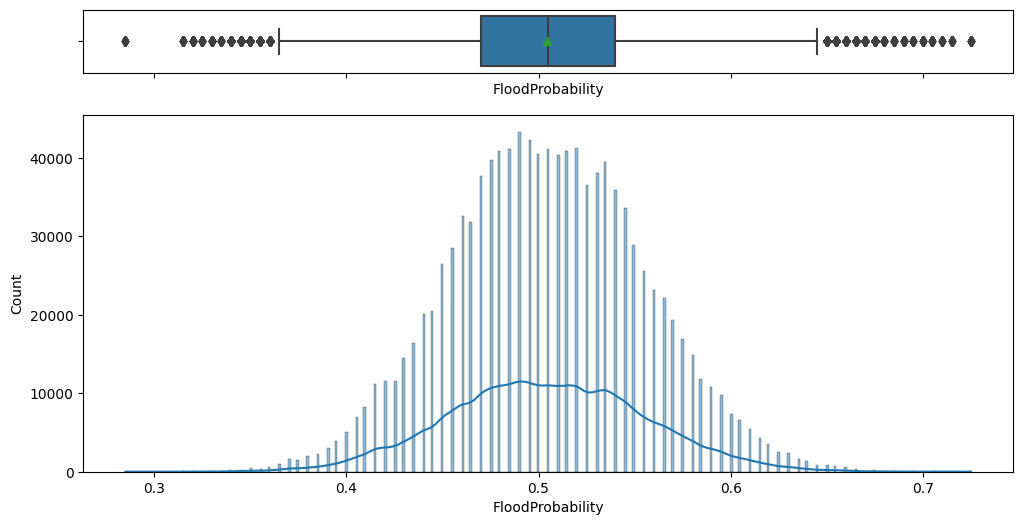

In [8]:
for col in train.columns:
    print(col)
    plot(train, col)

<Axes: >

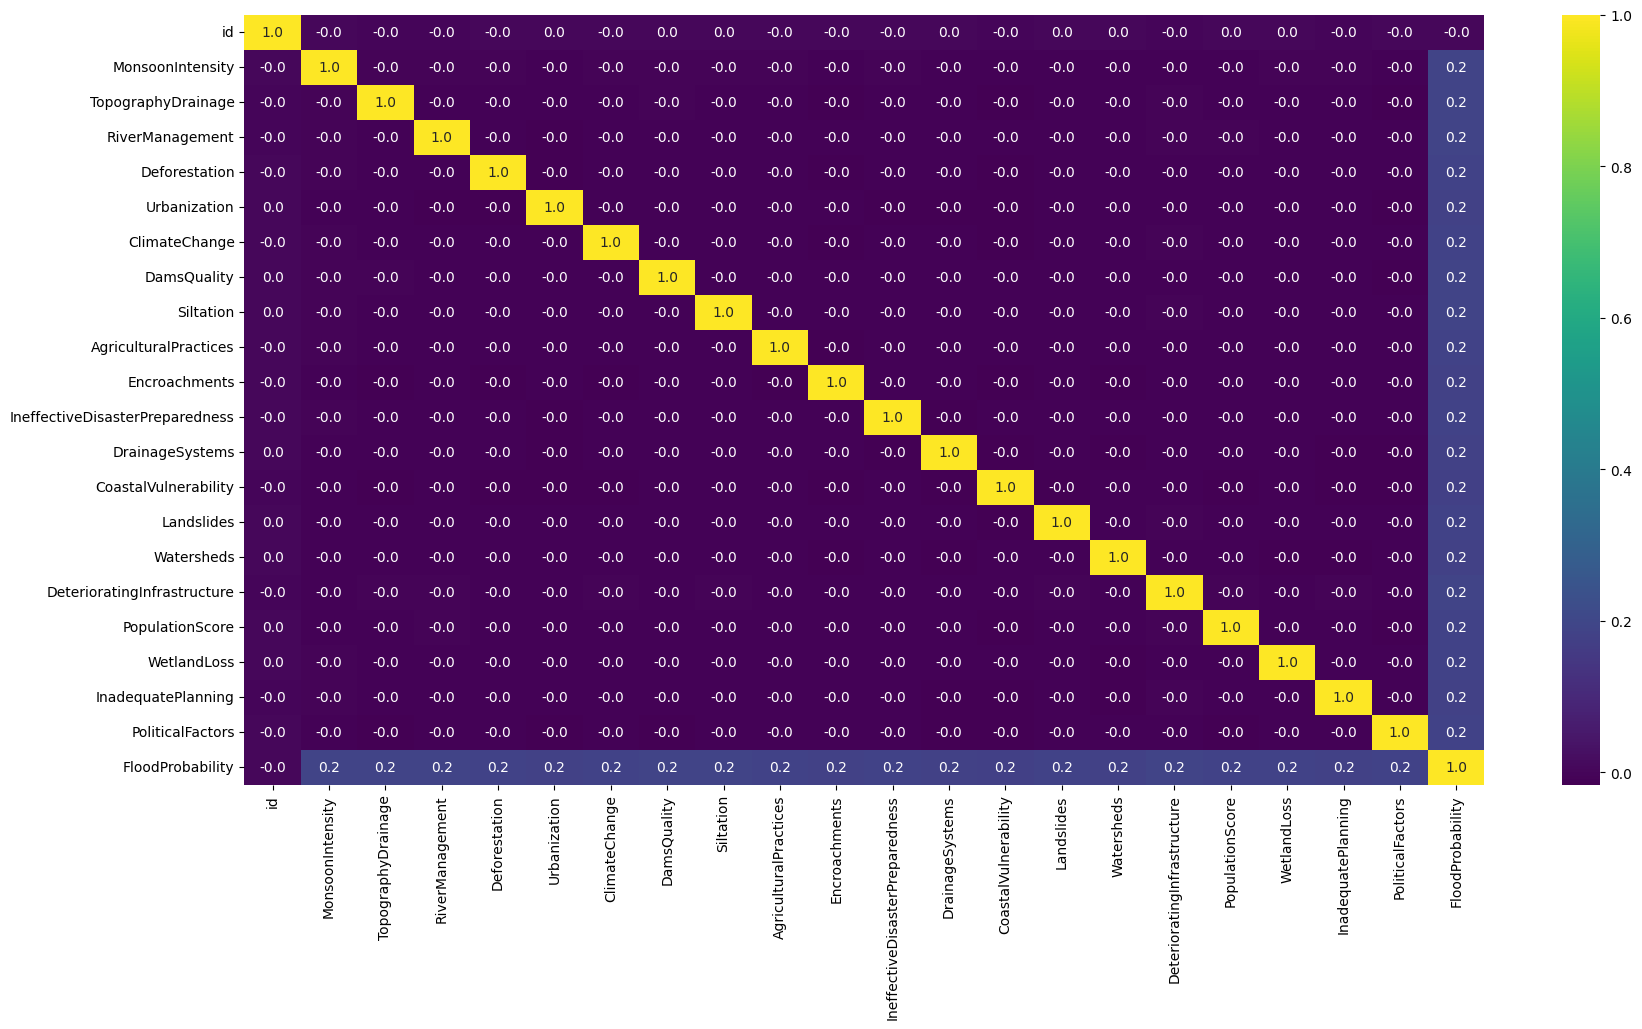

In [9]:
# Checking for correlations between features

plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True, fmt='.1f', cmap='viridis')

In [10]:
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
train_features = train.drop(['FloodProbability'], axis=1)
train_target = train['FloodProbability']

In [12]:
# Add an intercept term

train_features = sm.add_constant(train_features)

# Building the model on the OLS algorithm

ols_model = sm.OLS(train_target,train_features)

# Fitting the model

ols_result = ols_model.fit()

print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.901e+05
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:09:19   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117935   BIC:                        -5.564e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [14]:
# Splitting the data
X = train_features
y = train_target

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
lgbm_params = {
    'boosting_type': 'gbdt', 
    'n_estimators':1500, 
    'learning_rate' :  0.012,    
    'num_leaves' : 250, 
    'subsample_for_bin': 165700, 
    'min_child_samples': 114, 
    'reg_alpha': 2.075e-06, 
    'reg_lambda': 3.839e-07, 
    'colsample_bytree': 0.9634,
    'subsample': 0.9592, 
    'max_depth': 10,
    'random_state':0,
    'verbosity':-1}

lgbm_model = LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print(f"RMSE: {rmse: .2f}")
print(f"R2 Score: {r2: .4f}")


In [ ]:
feature_importances = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": lgbm_model.feature_importances_
})

# Sorting our features
feature_importances = feature_importances.sort_values(by="Importance", ascending = False)

# Plotting the importances
plt.figure(figsize=(20,10))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette = 'colorblind')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("LGBM Feature Importances")
plt.show()

In [ ]:
df_test.shape
df_test = sm.add_constant(df_test)

In [ ]:
df_test.head()

In [ ]:
y_sub =  lgbm_model.predict(df_test)

In [ ]:
print (y_sub)

In [ ]:
submission =  pd.DataFrame({'id': df_test['id'], 'predictions': y_sub})

print(submission)